In [2]:
pip install rembg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
pip install joblib


In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from rembg import remove
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

dataset = 'dataset-sampah3'
kategori = ['besi', 'kertas atau kardus', 'plastik']
label = {kategori: idx for idx, kategori in enumerate(kategori)}

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



Gambar acak dari besi:


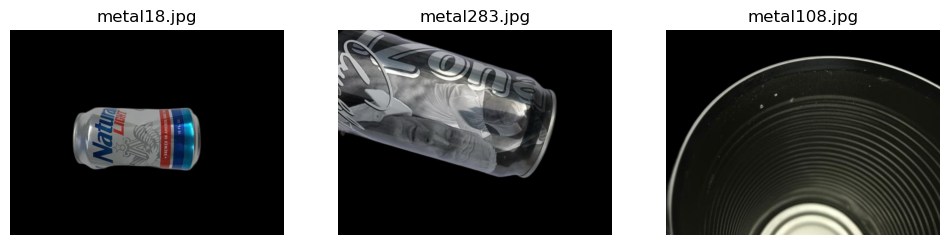


Gambar acak dari kertas atau kardus:


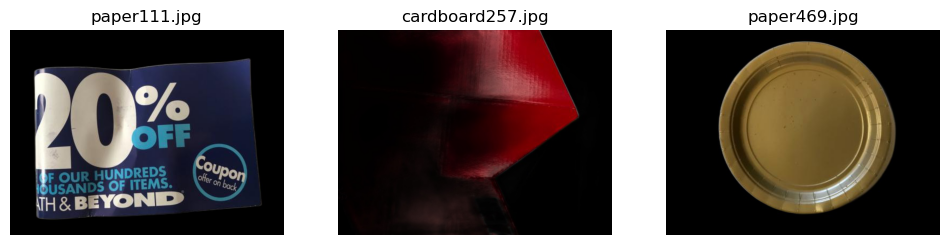


Gambar acak dari plastik:


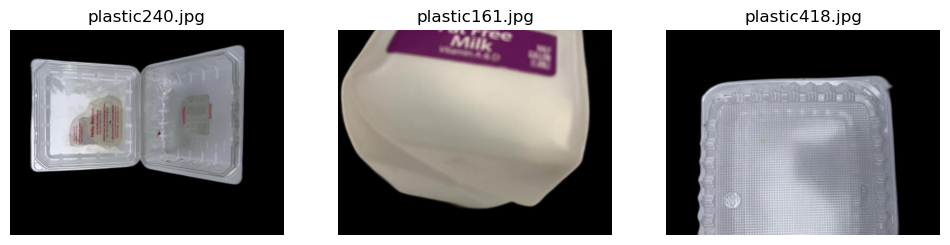

In [2]:
import os
import random
import matplotlib.pyplot as plt

def tampilkan_gambar_acak(kategori, num_images_per_category=3):
    # Fungsi untuk menampilkan gambar acak dari kategori yang diberikan
    # Parameter 'kategori' adalah list dari nama kategori
    # Parameter 'num_images_per_category' adalah jumlah gambar yang akan ditampilkan per kategori, defaultnya 3

    for kategori_item in kategori:
        # Loop melalui setiap kategori dalam list kategori

        category_path = os.path.join(dataset, kategori_item)
        # Membuat path ke folder kategori dengan menggabungkan path dataset dan nama kategori

        image_files = os.listdir(category_path)
        # Mendapatkan daftar semua file gambar dalam folder kategori

        random_images = random.sample(image_files, num_images_per_category)
        # Memilih sejumlah gambar acak dari daftar file gambar

        print(f"\nGambar acak dari {kategori_item}:")
        # Mencetak nama kategori yang sedang diproses

        plt.figure(figsize=(num_images_per_category * 4, 4))
        # Membuat figure baru untuk menampilkan gambar, dengan ukuran sesuai dengan jumlah gambar yang ditampilkan

        for i, image_file in enumerate(random_images):
            # Loop melalui setiap gambar acak yang dipilih

            image_path = os.path.join(category_path, image_file)
            # Membuat path lengkap ke file gambar

            image = plt.imread(image_path)
            # Membaca gambar dari file

            plt.subplot(1, num_images_per_category, i+1)
            # Menambahkan subplot pada figure, dengan posisi yang sesuai

            plt.imshow(image)
            # Menampilkan gambar pada subplot

            plt.title(image_file)
            # Memberikan judul pada subplot dengan nama file gambar

            plt.axis('off')
            # Mematikan axis pada subplot untuk tampilan yang lebih bersih

        plt.show()
        # Menampilkan figure dengan semua subplot


In [3]:
# Fungsi untuk mendapatkan label (indeks kelas) dari nama folder
def dapatkan_label(categories):
    # Inisialisasi dictionary kosong untuk menyimpan label
    labels = {}
    # Loop melalui setiap kategori dan indeksnya
    for i, category in enumerate(categories):
        # Menambahkan kategori sebagai key dan indeks sebagai value ke dictionary labels
        labels[category] = i
    # Mengembalikan dictionary labels
    return labels

# Dapatkan label untuk setiap kelas
labels = dapatkan_label(kategori)
# Memanggil fungsi dapatkan_label dengan daftar kategori dan menyimpan hasilnya di variabel labels

# Fungsi untuk mendapatkan label dan path file untuk semua gambar
def dapatkan_label_dan_path(dataset, labels):
    # Inisialisasi list kosong untuk menyimpan path gambar (X) dan label (y)
    X, y = [], []
    # Loop melalui setiap item (kategori dan label) dalam dictionary labels
    for category, label in labels.items():
        # Membuat path ke folder kategori dengan menggabungkan path dataset dan nama kategori
        category_path = os.path.join(dataset, category)
        # Memastikan bahwa path tersebut adalah direktori
        if os.path.isdir(category_path):
            # Mendapatkan daftar semua file gambar dalam folder kategori
            image_files = os.listdir(category_path)
            # Loop melalui setiap file gambar
            for image_file in image_files:
                # Membuat path lengkap ke file gambar
                image_path = os.path.join(category_path, image_file)
                # Menambahkan path gambar ke list X
                X.append(image_path)
                # Menambahkan label ke list y
                y.append(label)
    # Mengembalikan list X dan y
    return X, y

# Memanggil fungsi dapatkan_label_dan_path dengan dataset dan labels, menyimpan hasilnya di variabel X dan y
X, y = dapatkan_label_dan_path(dataset, labels)


In [4]:
# Tampilkan mapping deskripsi mengenai label kelas yang telah diencode
print("\nMapping deskripsi label kelas:")
# Mencetak judul untuk mapping deskripsi label kelas

for category, label in labels.items():
    # Loop melalui setiap item (kategori dan label) dalam dictionary labels

    print(f"{label}: {category}")
    # Mencetak label dan kategori yang sesuai dalam format "label: kategori"



Mapping deskripsi label kelas:
0: besi
1: kertas atau kardus
2: plastik


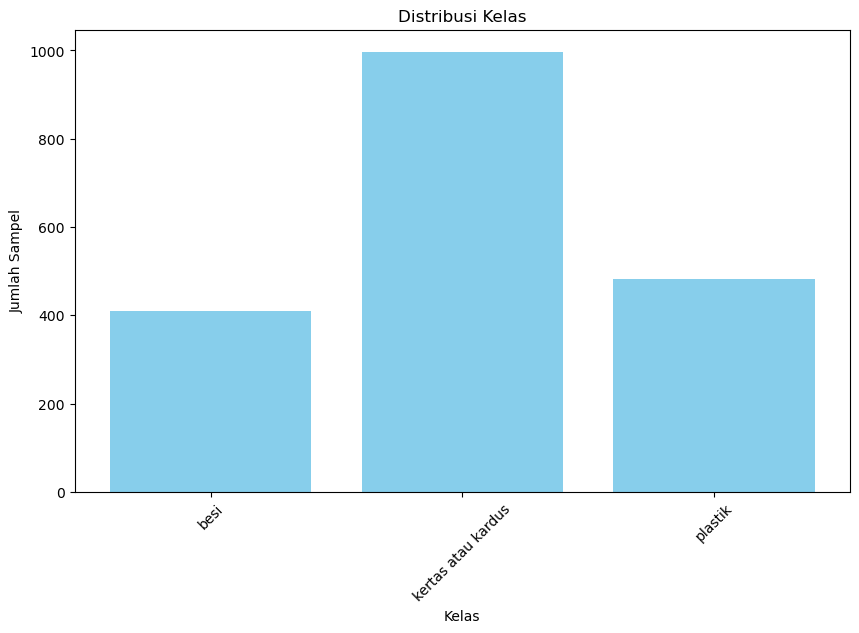

In [5]:
import numpy as np

def tampilkan_distribusi_kelas(y, categories):
    # Fungsi untuk menampilkan distribusi kelas berdasarkan label yang diberikan

    class_counts = np.bincount(y)
    # Menghitung jumlah kemunculan masing-masing label dalam y menggunakan numpy.bincount

    plt.figure(figsize=(10, 6))
    # Membuat figure baru dengan ukuran 10x6

    plt.bar(categories, class_counts, color='skyblue')
    # Membuat bar chart dengan kategori sebagai sumbu x dan class_counts sebagai tinggi bar, dengan warna bar skyblue

    plt.title('Distribusi Kelas')
    # Memberikan judul pada grafik

    plt.xlabel('Kelas')
    # Memberikan label pada sumbu x

    plt.ylabel('Jumlah Sampel')
    # Memberikan label pada sumbu y

    plt.xticks(rotation=45)
    # Memutar label sumbu x sebesar 45 derajat untuk meningkatkan keterbacaan

    plt.show()
    # Menampilkan grafik

# Memanggil fungsi tampilkan_distribusi_kelas dengan label y dan daftar kategori
tampilkan_distribusi_kelas(y, kategori)


In [6]:
import os
import cv2
from collections import defaultdict

# Membuat dictionary dengan nilai default integer (dimulai dari 0) untuk menyimpan ukuran gambar
ukuran_gambar = defaultdict(int)

def dapatkan_ukuran_gambar(dataset):
    # Fungsi untuk mendapatkan ukuran gambar dari dataset
    
    for category in os.listdir(dataset):
        # Loop melalui setiap item dalam direktori dataset
        
        category_path = os.path.join(dataset, category)
        # Membuat path lengkap ke folder kategori
        
        if os.path.isdir(category_path):
            # Memastikan bahwa path tersebut adalah direktori
            
            for image_file in os.listdir(category_path):
                # Loop melalui setiap file gambar dalam folder kategori
                
                image_path = os.path.join(category_path, image_file)
                # Membuat path lengkap ke file gambar
                
                image = cv2.imread(image_path)
                # Membaca gambar menggunakan OpenCV
                
                if image is not None:
                    # Memastikan gambar berhasil dibaca
                    
                    height, width, _ = image.shape
                    # Mendapatkan tinggi dan lebar gambar
                    
                    size_str = f'{width}x{height}'
                    # Membuat string yang merepresentasikan ukuran gambar (lebar x tinggi)
                    
                    ukuran_gambar[size_str] += 1
                    # Menambah hitungan untuk ukuran gambar yang sesuai dalam dictionary ukuran_gambar
    
    return ukuran_gambar
    # Mengembalikan dictionary ukuran_gambar

dataset = 'dataset-sampah3'
# Menentukan path ke dataset

ukuran_gambar = dapatkan_ukuran_gambar(dataset)
# Memanggil fungsi dapatkan_ukuran_gambar dengan dataset dan menyimpan hasilnya di variabel ukuran_gambar

for size, count in ukuran_gambar.items():
    # Loop melalui setiap item (ukuran dan jumlah) dalam dictionary ukuran_gambar
    
    print(f'Ukuran: {size}, Jumlah: {count}')
    # Mencetak ukuran gambar dan jumlahnya

total_data = sum(ukuran_gambar.values())
# Menghitung total jumlah data dengan menjumlahkan semua nilai dalam dictionary ukuran_gambar

print(f'Total jumlah data: {total_data}')
# Mencetak total jumlah data


Ukuran: 512x384, Jumlah: 1889
Total jumlah data: 1889


In [7]:
import cv2

def preprocess_image(image_path):
    # Fungsi untuk melakukan preprocessing pada gambar

    image = cv2.imread(image_path)
    # Membaca gambar dari path yang diberikan menggunakan OpenCV
    
    # Remove background
    # image_no_bg = remove(image)
    # Menghapus background dari gambar (baris ini dikomentari karena fungsinya tidak diimplementasikan)
    
    # Normalize image (rescale pixel values to range [0, 1])
    normalized_image = image / 255.0
    # Menormalkan gambar dengan membagi setiap nilai piksel dengan 255.0 untuk mengubah skala piksel menjadi rentang [0, 1]
    
    return normalized_image
    # Mengembalikan gambar yang telah dinormalisasi


In [8]:
# Memproses semua gambar dalam daftar X dengan fungsi preprocess_image
X_preprocessed = [preprocess_image(image_path) for image_path in X]

In [9]:
# Convert list ke numpy array
X_preprocessed = np.array(X_preprocessed)

In [10]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [11]:
# Mencetak dimensi fitur asli dari set pelatihan
print(f"Original feature dimensions: {X_train.shape}")


Original feature dimensions: (1511, 384, 512, 3)


In [12]:
from sklearn.decomposition import PCA
# Import modul PCA dari sklearn.decomposition

pca = PCA(n_components=3) 
# Inisialisasi objek PCA dengan 3 komponen utama

X_train_pca = []
X_test_pca = []
# Inisialisasi list kosong untuk menyimpan fitur yang telah diubah PCA dari set pelatihan dan pengujian

for i in range(3):  # RGB
    # Loop melalui setiap lapisan warna (Merah, Hijau, Biru)

    # Ratakan lapisan warna dan terapkan PCA
    X_train_layer = X_train[:, :, :, i].reshape(len(X_train), -1)
    # Ratakan lapisan warna dalam set pelatihan dan ubah bentuknya menjadi (jumlah_sampel, jumlah_piksel_per_lapisan)
    
    X_test_layer = X_test[:, :, :, i].reshape(len(X_test), -1)
    # Ratakan lapisan warna dalam set pengujian dan ubah bentuknya menjadi (jumlah_sampel, jumlah_piksel_per_lapisan)
    
    pca.fit(X_train_layer)
    # Terapkan PCA pada lapisan warna dalam set pelatihan
    
    X_train_layer_pca = pca.transform(X_train_layer)
    # Terapkan transformasi PCA pada lapisan warna dalam set pelatihan
    
    X_test_layer_pca = pca.transform(X_test_layer)
    # Terapkan transformasi PCA pada lapisan warna dalam set pengujian

    # Tambahkan fitur yang telah diubah PCA ke list
    X_train_pca.append(X_train_layer_pca)
    X_test_pca.append(X_test_layer_pca)

# Gabungkan fitur yang telah diubah PCA
X_train_pca = np.hstack(X_train_pca)
# Gabungkan fitur yang telah diubah PCA dari set pelatihan menjadi satu array numpy
X_test_pca = np.hstack(X_test_pca)
# Gabungkan fitur yang telah diubah PCA dari set pengujian menjadi satu array numpy

print(f"Dimensi fitur asli: {X_train.shape}")
# Mencetak dimensi fitur asli dari set pelatihan

print(f"Dimensi setelah PCA: {X_train_pca.shape}")
# Mencetak dimensi fitur setelah diterapkan PCA dari set pelatihan


Dimensi fitur asli: (1511, 384, 512, 3)
Dimensi setelah PCA: (1511, 9)


In [13]:
import joblib
# Mengimpor modul joblib untuk menyimpan model ke file

joblib.dump(pca, 'model_pca_svm.pkl')
# Menyimpan model PCA ke file dengan nama 'model_pca_svm.pkl'


['model_pca_svm.pkl']

# Kernel Linear

In [18]:
svm = SVC(kernel='linear')
# Membuat objek Support Vector Classifier (SVM) dengan kernel linear

svm.fit(X_train_pca, y_train)
# Melatih model SVM menggunakan fitur yang telah diubah dengan PCA (X_train_pca) dan labelnya (y_train)


SVC(kernel='linear')

In [19]:
y_pred = svm.predict(X_test_pca)
# Membuat prediksi menggunakan model SVM terlatih pada fitur yang telah diubah dengan PCA dari data pengujian (X_test_pca)

print(classification_report(y_test, y_pred, target_names=kategori))
# Mencetak laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, dan f1-score untuk setiap kelas
# Argument target_names=kategori digunakan untuk memberikan nama kelas yang sesuai dalam laporan klasifikasi

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Mencetak akurasi dari model SVM yang telah dilatih pada data pengujian
# Akurasi adalah proporsi sampel yang telah diklasifikasikan dengan benar dari total sampel


                    precision    recall  f1-score   support

              besi       0.33      0.05      0.09        82
kertas atau kardus       0.58      0.90      0.71       191
           plastik       0.66      0.46      0.54       105

          accuracy                           0.59       378
         macro avg       0.52      0.47      0.44       378
      weighted avg       0.55      0.59      0.53       378

Accuracy: 0.58994708994709


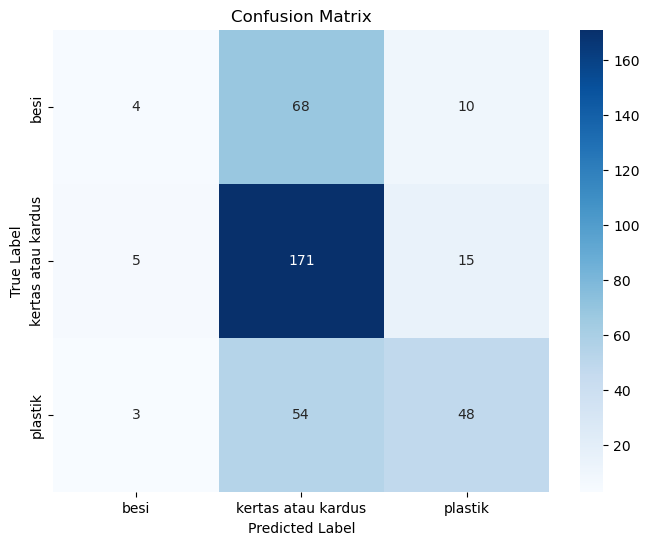

In [20]:
from sklearn.metrics import confusion_matrix
# Mengimpor fungsi confusion_matrix dari modul sklearn.metrics untuk menghitung matriks kebingungan

import seaborn as sns
# Mengimpor modul seaborn untuk plotting visualisasi

conf_matrix = confusion_matrix(y_test, y_pred)
# Menghitung matriks kebingungan menggunakan nilai sebenarnya (y_test) dan prediksi (y_pred)

plt.figure(figsize=(8, 6))
# Membuat figure baru dengan ukuran 8x6

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=kategori, yticklabels=kategori)
# Membuat heatmap dari matriks kebingungan dengan anotasi angka, format integer, dan skala warna Blues
# Argument xticklabels dan yticklabels digunakan untuk menentukan label sumbu x dan y dari heatmap berdasarkan nama kategori

plt.xlabel('Predicted Label')
# Menambahkan label pada sumbu x (label yang diprediksi)

plt.ylabel('True Label')
# Menambahkan label pada sumbu y (label yang benar)

plt.title('Confusion Matrix')
# Menambahkan judul pada plot

plt.show()
# Menampilkan plot


In [21]:
joblib.dump(svm, 'model_svm_linear.pkl')

['model_svm_linear.pkl']

# Kernel RBF

In [22]:
svmrbf = SVC(kernel='rbf')
# Membuat objek Support Vector Classifier (SVM) dengan kernel radial basis function (RBF)

svmrbf.fit(X_train_pca, y_train)
# Melatih model SVM menggunakan fitur yang telah diubah dengan PCA (X_train_pca) dan labelnya (y_train)


SVC()

In [23]:
# Membuat prediksi menggunakan model SVM dengan kernel RBF
y_pred = svmrbf.predict(X_test_pca)


In [25]:
# Mencetak laporan klasifikasi yang mencakup metrik evaluasi seperti precision, recall, dan f1-score untuk setiap kelas
# Argument target_names=kategori digunakan untuk memberikan nama kelas yang sesuai dalam laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=kategori))

# Mencetak akurasi dari model SVM dengan kernel RBF yang telah dilatih pada data pengujian
# Akurasi adalah proporsi sampel yang telah diklasifikasikan dengan benar dari total sampel
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


                    precision    recall  f1-score   support

              besi       0.76      0.32      0.45        82
kertas atau kardus       0.63      0.88      0.74       191
           plastik       0.66      0.48      0.55       105

          accuracy                           0.65       378
         macro avg       0.68      0.56      0.58       378
      weighted avg       0.67      0.65      0.62       378

Accuracy: 0.6481481481481481


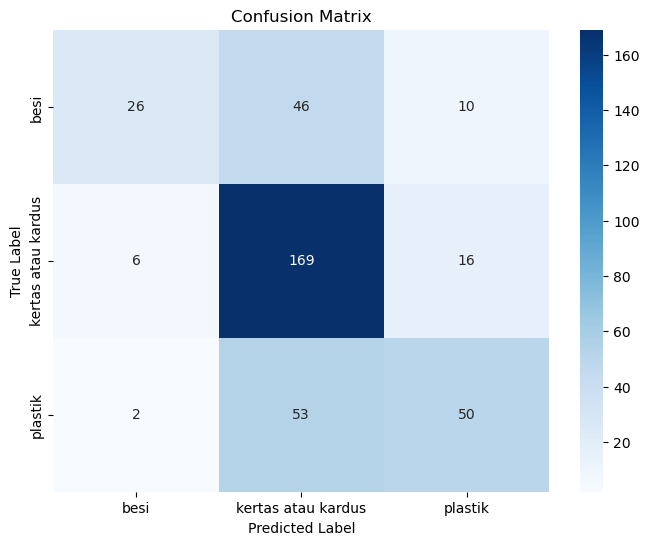

In [27]:
# Menghitung matriks kebingungan menggunakan nilai sebenarnya (y_test) dan prediksi (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat figure baru dengan ukuran 8x6
plt.figure(figsize=(8, 6))

# Membuat heatmap dari matriks kebingungan dengan anotasi angka, format integer, dan skala warna Blues
# Argument xticklabels dan yticklabels digunakan untuk menentukan label sumbu x dan y dari heatmap berdasarkan nama kategori
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=kategori, yticklabels=kategori)

# Menambahkan label pada sumbu x yang menunjukkan label yang diprediksi
plt.xlabel('Predicted Label')

# Menambahkan label pada sumbu y yang menunjukkan label yang sebenarnya dari data
plt.ylabel('True Label')

# Menambahkan judul pada plot untuk menggambarkan bahwa ini adalah matriks kebingungan
plt.title('Confusion Matrix')

# Menampilkan plot
plt.show()


In [28]:
joblib.dump(svm, 'model_svm_rbf.pkl')

['model_svm_rbf.pkl']

# Objek dectection INPUT USER

Masukkan jalur file gambar: /Users/ferdirj/Downloads/dataset-sampah2/paper/paper35.jpg


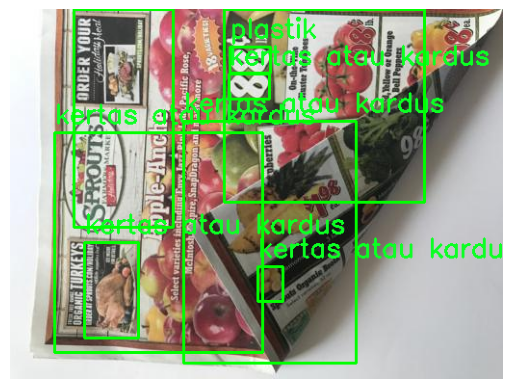

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Fungsi untuk mendapatkan label (indeks kelas) dari nama folder
def mendapatkan_label(kategori):
    labels = {}
    for i, kategori in enumerate(kategori):
        labels[kategori] = i
    return labels

# Daftar kategori sampah
kategori = ['besi', 'kertas atau kardus', 'plastik']
# Mendapatkan label (indeks kelas) untuk setiap kategori
label = mendapatkan_label(kategori)

# Memuat model SVM dan model PCA yang telah disimpan sebelumnya
svm = joblib.load('model_svm_rbf.pkl')
pca = joblib.load('model_pca_svm.pkl')

# Fungsi untuk memilih gambar dari pengguna
def pilih_gambar():
    while True:
        image_path = input("Masukkan jalur file gambar: ")
        if os.path.isfile(image_path):
            return image_path
        else:
            print("Jalur file tidak valid. Harap masukkan jalur yang valid.")

# Fungsi untuk memproses gambar sebelum prediksi
def pra_proses_gambar(image_path, ukuran_target):
    image = cv2.imread(image_path)
    # Menyesuaikan ukuran gambar
    resized_image = cv2.resize(image, ukuran_target)
    # Konversi ke citra keabuan
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Deteksi tepi dengan metode Canny
    edges = cv2.Canny(gray, 50, 150)
    edges = cv2.bitwise_not(edges)
    _, mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
    # Terapkan mask ke gambar asli
    result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
    return result

# Fungsi untuk mendeteksi objek dalam gambar
def deteksi_objek(image_path, luas_contour_min=500):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    # Temukan kontur
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Inisialisasi list untuk bounding box 
    boxes = []
    # membuat bounding box di sekitar objek yang terdeteksi
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > luas_contour_min:
            x, y, w, h = cv2.boundingRect(contour)
            boxes.append((x, y, w, h))
    return boxes

# Fungsi untuk memprediksi kategori sampah dari gambar
def prediksi_kategori_sampah(image_path, model, model_pca, ukuran_target=(384, 512)):
    preprocessed_image = pra_proses_gambar(image_path, ukuran_target)
    
    # Normalisasi gambar (rescale nilai piksel ke rentang [0, 1])
    normalized_image = preprocessed_image / 255.0
    
    # PCA tiap layer
    X = []
    for i in range(3):  # RGB
        layer = normalized_image[:, :, i].flatten()
        X_layer_pca = model_pca.transform([layer])
        X.append(X_layer_pca)
    X_pca = np.hstack(X)
    
    # Prediksi kategori sampah
    prediction = model.predict(X_pca)
    predicted_category = kategori[prediction[0]]
    return predicted_category

# Fungsi untuk memprediksi kategori sampah dengan deteksi objek
def prediksi_kategori_sampah_dengan_deteksi(image_path, model, model_pca, ukuran_target=(384, 512)):
    # Deteksi objek dalam gambar
    boxes = deteksi_objek(image_path)

    image = cv2.imread(image_path)

    # Iterasi kotak yang terdeteksi
    for (x, y, w, h) in boxes:
        # Potong objek yang terdeteksi dari gambar
        cropped_image = image[y:y+h, x:x+w]
        
        # Simpan gambar yang dipotong sementara untuk memprediksi kategorinya
        temporary_path = 'temp.jpg'
        cv2.imwrite(temporary_path, cropped_image)
        
        # Prediksi kategori dari gambar yang dipotong
        predicted_category = prediksi_kategori_sampah(temporary_path, model, model_pca, ukuran_target)
        
        # Gambar kotak pembatas dan label pada gambar asli
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, predicted_category, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        
        # Hapus gambar yang dipotong sementara
        os.remove(temporary_path)
    
    # Tampilkan citra dengan bounding box dan label
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Pilih gambar untuk diprediksi
image_path = pilih_gambar()
if image_path:
    # Lakukan prediksi kategori sampah dengan deteksi objek
    prediksi_kategori_sampah_dengan_deteksi(image_path, svm, pca)
else:
    print("Tidak ada gambar yang dipilih.")



__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________